<font size = 6>**Exploratory Data Analysis of Zomato Restaurant Data Using Python**</font>

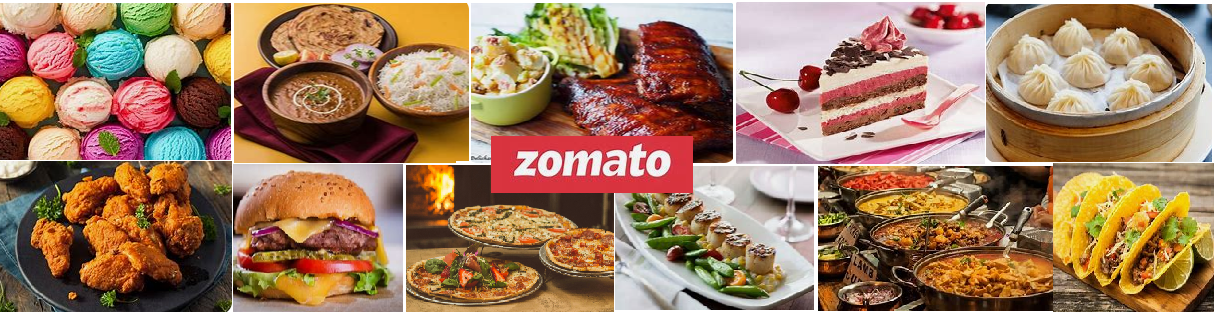

________________________________________________________________________________
# 1. Load Dependencies
________________________________________________________________________________

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

________________________________________________________________________________
# 2. Load and Understand data
________________________________________________________________________________

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrutimehta/zomato-restaurants-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shrutimehta/zomato-restaurants-data/versions/2


In [ ]:
# Load data from kaggle
ctry = pd.read_excel(path + "/Country-Code.xlsx")
zomato = pd.read_csv(path + "/zomato.csv", encoding='latin-1')

In [ ]:
#Merge zomato and ctry on Country Code
data = pd.merge(zomato, ctry, on='Country Code')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [ ]:
data.shape

(9551, 22)

In [ ]:
# List columns in dataset
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

________________________________________________________________________________
# 3. Data Cleaning
________________________________________________________________________________

In [ ]:
# Check for duplicates
data.duplicated().sum()

0

In [ ]:
# Change column names to lowercase and replace whitespaces
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'country'],
      dtype='object')

In [ ]:
# Check for missing values
for col in data.columns:
  if(data[col].isnull().sum() > 0):
    print(f'{col} :  {data[col].isnull().sum()/len(data) * 100:.2f}% of values are missing.')

cuisines :  0.09% of values are missing.


In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
df = data.copy()

In [ ]:
# Write cleaned data for India to a csv for PostgreSQL with latin_1 encoding
df.to_csv('zomato_cleaned.csv', index=False, encoding='latin-1')

91% of the data are for restaurants in India. For Tableau we will focus only on India and its attributes.

In [ ]:
# Write cleaned data to excel file for Tableau
df_india = df[df['country'] == 'India'].reset_index(drop=True)
df_india.to_excel('zomato_india.xlsx', index=False)

________________________________________________________________________________
# 4. Exploratory Data Analysis
________________________________________________________________________________

In [ ]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'country'],
      dtype='object')

In [ ]:
df.shape[0]

9542

## 4.1 Geographical Analysis

### 4.1.1 What is the country with the highest ratings?

We can perform a comparative analysis between countries, helping to identify which countries excel in restaurant quality and customer satisfaction.

#### <b>Global Restaurant Distribution</b>

Here we have an overview of where restaurants are concentrated globally, highlighting key markets and potential areas for expansion.

In [ ]:
# Compute the total number of restaurants in the dataset
total_restaurants = df['restaurant_id'].count()
# Find the total number of restaurants by country
rsts_cty = df.groupby(['country']).size().reset_index(name='total_rsts_cty')
# Append the percentage of total restaurants by country to the data
rsts_cty['pct_of_total'] = round(rsts_cty['total_rsts_cty'] / total_restaurants * 100, 2)
rsts_cty.sort_values(by='total_rsts_cty', ascending=False, inplace=True)
#rsts_cty.head()

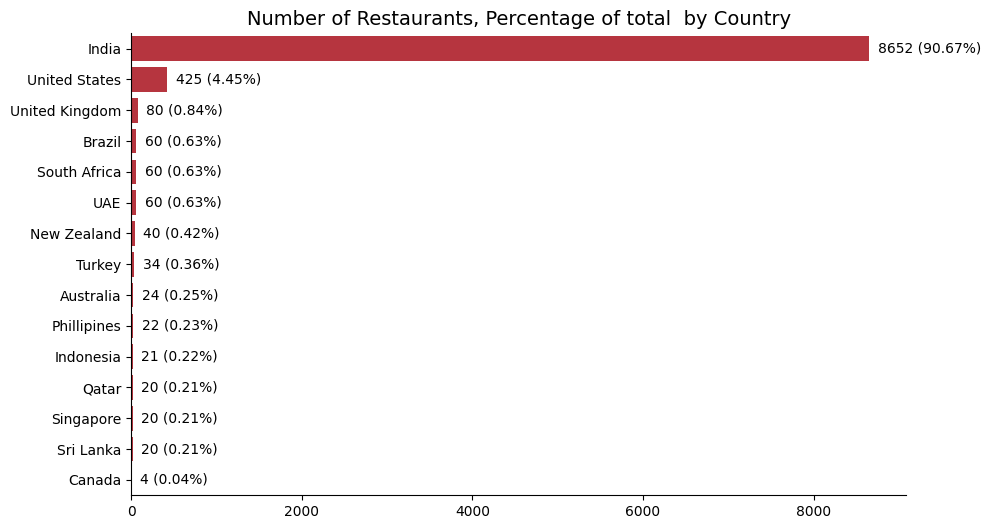

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot( x = 'total_rsts_cty', y = 'country', data = rsts_cty, orient='h', color='#cb202d')

for bar, count, percentage in zip(ax.patches, rsts_cty['total_rsts_cty'], rsts_cty['pct_of_total']):
    ax.text(
        bar.get_width() + 100,
        bar.get_y() + bar.get_height() / 2,
        f'{int(count)} ({percentage}%)',
        ha='left',
        va='center',
        fontsize=10
    )

# Despine the plot
sns.despine(right=True, top=True)

# Remove gridlines
ax.grid(False)

# Add titles and labels
plt.title('Number of Restaurants, Percentage of total  by Country', fontsize=14)
plt.xlabel('')
plt.ylabel('')

# Show plot
plt.show()

<font color='#cb202d'>*The bar plot illustrates the distribution of restaurants across different countries on a global scale so that the country with the most restaurants can be identified.*</font>

#### <b>Countries with Most 'Excellent' rated Restaurants</b>

This analysis provides a global comparison of restaurant standards, highlighting countries with top-tier establishments and offering insights into culinary excellence across cultures. Additionally, it identifies potential investment opportunities and informs marketing strategies by understanding customer preferences and tourism insights.

In [ ]:
df['rating_text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [ ]:
excellent_ratings = df[df['rating_text'] == 'Excellent']
print(f'Out of {len(df)}, {len(excellent_ratings)} restaurants({round(len(excellent_ratings)/len(df)*100,2)}% of the total) have an Excellent rating.')

Out of 9542, 300 restaurants(3.14% of the total) have an Excellent rating.


In [ ]:
excellent_ratings_ctry = excellent_ratings.groupby(('country')).size().reset_index(name='excellent_rating_count')
excellent_ratings_ctry= excellent_ratings_ctry.sort_values(by='excellent_rating_count', ascending=False).reset_index(drop=True)
excellent_ratings_ctry1 = pd.merge(excellent_ratings_ctry, rsts_cty[['country','total_rsts_cty']], on='country')
excellent_ratings_ctry1['pct_of_ctry_total'] = round((excellent_ratings_ctry1['excellent_rating_count'] / excellent_ratings_ctry1['total_rsts_cty'])* 100, 1)
excellent_ratings_ctry1.sort_values(by='pct_of_ctry_total', ascending=False, inplace=True)
#excellent_ratings_ctry1.head()

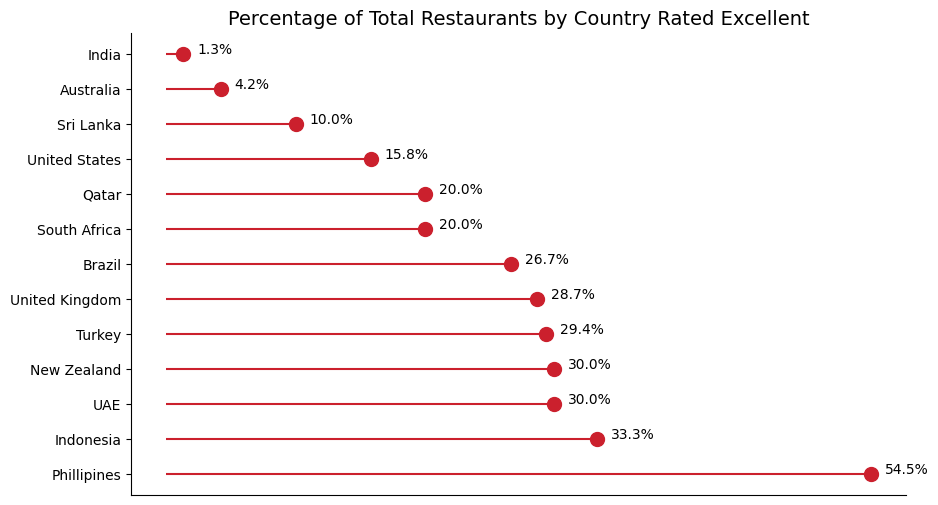

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stem (line) for lollipop plot
ax.hlines(y=excellent_ratings_ctry1['country'], xmin=0, xmax=excellent_ratings_ctry1['pct_of_ctry_total'], color='#cb202d')

# Plot the markers (circles) for lollipop plot
ax.scatter(y=excellent_ratings_ctry1['country'], x=excellent_ratings_ctry1['pct_of_ctry_total'], color='#cb202d', s=100)

sns.despine(right=True, top=True)

# Add text annotations
# Change the range to iterate over the length of excellent_ratings_ctry1 instead of df
for i in range(len(excellent_ratings_ctry1)):
  ax.annotate(f"{excellent_ratings_ctry1['pct_of_ctry_total'].iloc[i]}%",
   (excellent_ratings_ctry1['pct_of_ctry_total'].iloc[i], excellent_ratings_ctry1['country'].iloc[i]),
              textcoords="offset points",
              xytext=(10,0),
              ha='left',
              fontsize=10)

# Remove gridlines
ax.grid(False)

# Edit tick marks and labels
ax.set_xticklabels([])
ax.tick_params(bottom=False)
plt.yticks(fontsize=10)

# Add title and labels
plt.title('Percentage of Total Restaurants by Country Rated Excellent', fontsize=14)
plt.xlabel('')
plt.ylabel('')

# Show plot
plt.show()

<font color='#cb202d'>*The lollipop plot provides a clear comparative view of the quality of restaurants across different countries, highlighting where excellence in dining is more prevalent.*</font>

#### <b>Average Overall Rating of Restaurants by Country</b>

This analysis enables a comparative evaluation of restaurant quality across different countries, helping identify global trends and patterns in dining experiences. It offers valuable market insights, benchmarks for best practices, and strategic planning information for businesses to understand market potential and tailor their approaches.



In [ ]:
ratings_ctry = (
    df.groupby('country')['aggregate_rating']
    .agg(avg_overall_rating = 'mean', sd = 'std') # compute both mean and stdev
    .sort_values(by='avg_overall_rating', ascending=False)
    .reset_index()
)
ratings_ctry['avg_overall_rating'] = round(ratings_ctry['avg_overall_rating'], 1)


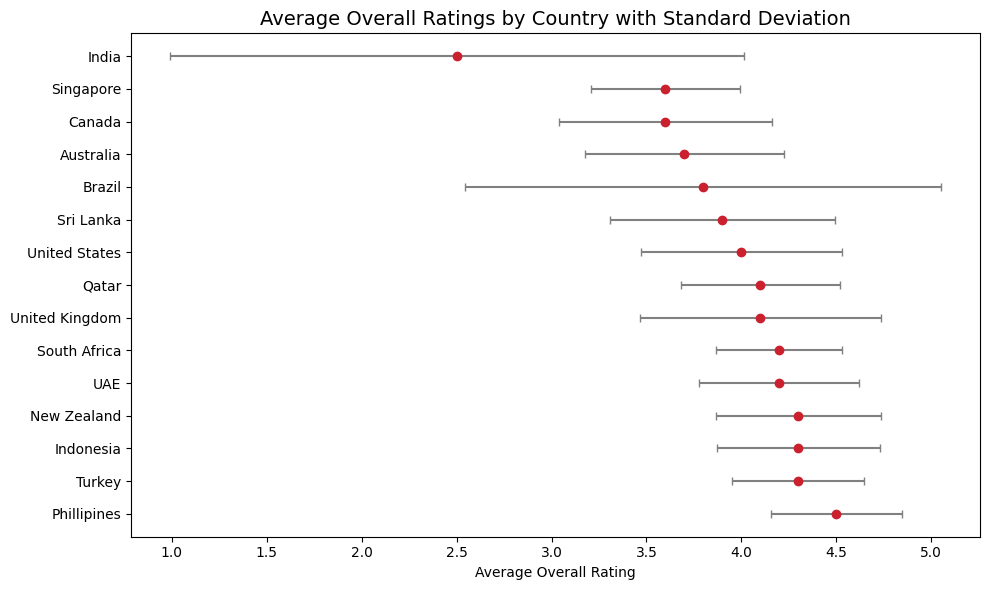

In [ ]:
plt.figure(figsize=(10, 6))

# Create a scatter plot with error bars
plt.errorbar(
    x=ratings_ctry['avg_overall_rating'],
    y=ratings_ctry['country'],
    xerr=ratings_ctry['sd'],  # Standard deviation as error bars
    fmt='o',  # Circle marker
    ecolor='gray',  # Color of the error bars
    capsize=3,  # Length of error bar caps
    color='#cb202d',  # Marker color
    markersize=6,  # Marker size
    linestyle=''  # No line connecting points
)

# Add labels and title
plt.title('Average Overall Ratings by Country with Standard Deviation', fontsize=14)
plt.xlabel('Average Overall Rating')
plt.ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

<font color='#cb202d'>*The scatterplot with errorbars is useful for understanding regional differences in ratings. It highlights not just the average ratings, but also the reliability and consistency of those ratings across different countries.*</font>

### ☝Conclusion

India accounts for **90.8% of all restaurants** in the dataset, making it the country with the largest number of top ratings. However, it has the **lowest average overall rating** and the **widest standard deviation**, which aligns with its dominance in sheer restaurant numbers, as observed.

The Philippines, which falls within the remaining 10% of restaurants represented on the Zomato platform, stands out for its **highest overall average rating** and a **small standard deviation**, reflecting more consistent ratings. Remarkably, **54.5% of its 22 restaurants** are rated as excellent, securing its position as a top-performing country in terms of quality.

**When focusing on the quality of ratings, the Philippines ranks the highest.**

## 4.2 Restaurant Performance Analysis

### 4.2.1 Top 10 Indian cities with the most successful restaurants

This analysis identifies cities with the most successful restaurant scenes, providing insights into regional dining trends, consumer preferences, and the competitive landscape. It offers valuable business and investment opportunities, guides policy and urban planning, and helps tailor market strategies.



In [ ]:
rsts_cty = df_india.groupby(['city']).size().reset_index(name='total_restaurants')

In [ ]:
df_india_success = df_india[(df_india['aggregate_rating'] >= 3.6) & (df_india['votes'] >= 100)]
rsts_success_cty = df_india_success.groupby(['city']).size().reset_index(name='successful_restaurants')

In [ ]:
success_df = pd.merge( rsts_success_cty, rsts_cty, on='city', how='left')
success_df['pct_success_rsts'] = round(success_df['successful_restaurants'] / success_df['total_restaurants'] * 100, 1)
success_df.sort_values(by='pct_success_rsts', ascending=False, inplace=True)

In [ ]:
# City must have more than 5 restaurants to be included
success_df = success_df[success_df['total_restaurants'] > 5].reset_index(drop=True)
top_10 = success_df.head(10)

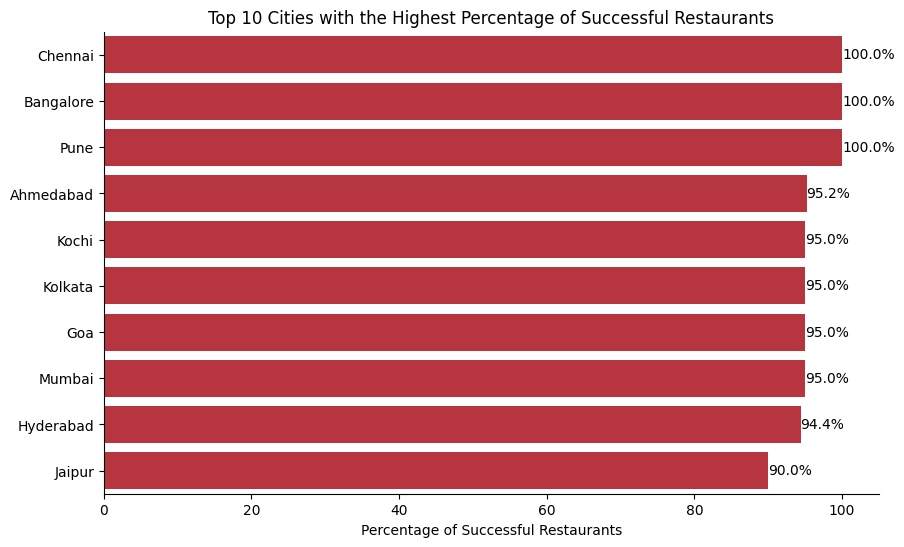

In [ ]:
# Create plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='pct_success_rsts', y='city',data = top_10, color = '#CB202D' )
# Add text
for bar,percentage in zip(ax.patches, top_10['pct_success_rsts']):
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{percentage}%',
        ha='left',
        va='center',
        fontsize=10
    )
# Despine the plot
sns.despine(right=True, top=True)
# Update title and axes labels
plt.title('Top 10 Cities with the Highest Percentage of Successful Restaurants')
plt.xlabel('Percentage of Successful Restaurants')
plt.ylabel('')
plt.show()

<font color='#cb202d'>*The horizontal bar plot showcases the top 10 Indian cities with the highest percentage of successful restaurants. It highlights the top performers.*</font>

### ☝ Conclusion

The top 10 cities in the visualization have a remarkably high percentage of successful restaurants, all exceeding 90% and with several at a perfect 100% (**Chennai, Bangalore and Pune**). This suggests that these cities provide a thriving environment for restaurants meeting the specific criteria for success (overall rating and votes above the 75th percentile).

## 4.3 Price Analysis

In [ ]:
df['price_range'].unique()

array([3, 4, 2, 1])

In [ ]:
mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df['price_range'] = df['price_range'].map(mapping)

### 4.3.1 Price Range Analysis: Customer Preferences and Perceived Value

This analysis aims to identify the most popular price range among customers by examining their voting behavior and overall ratings. We will investigate consumer preferences to understand which price points are most in demand, identify market trends, and assess the relationship between perceived quality and price to understand the target audience's spending capacity.


####<b> Examining Vote Counts and Ratings Across Price Categories </b>

This section explores how customer preferences and satisfaction vary depending on price points. By visualizing these trends, businesses can make informed decisions about pricing strategies and marketing efforts.

In [ ]:
df_price_votes = df.groupby(['price_range'])['votes'].sum().reset_index()
df_price_ratings = df.groupby(['price_range'])['aggregate_rating'].mean().reset_index(name='avg_overall_rating')

In [ ]:
df_price_ratings

,price_range,avg_overall_rating
0,High,3.682633
1,Low,1.997476
2,Medium,2.941054
3,Very High,3.817918


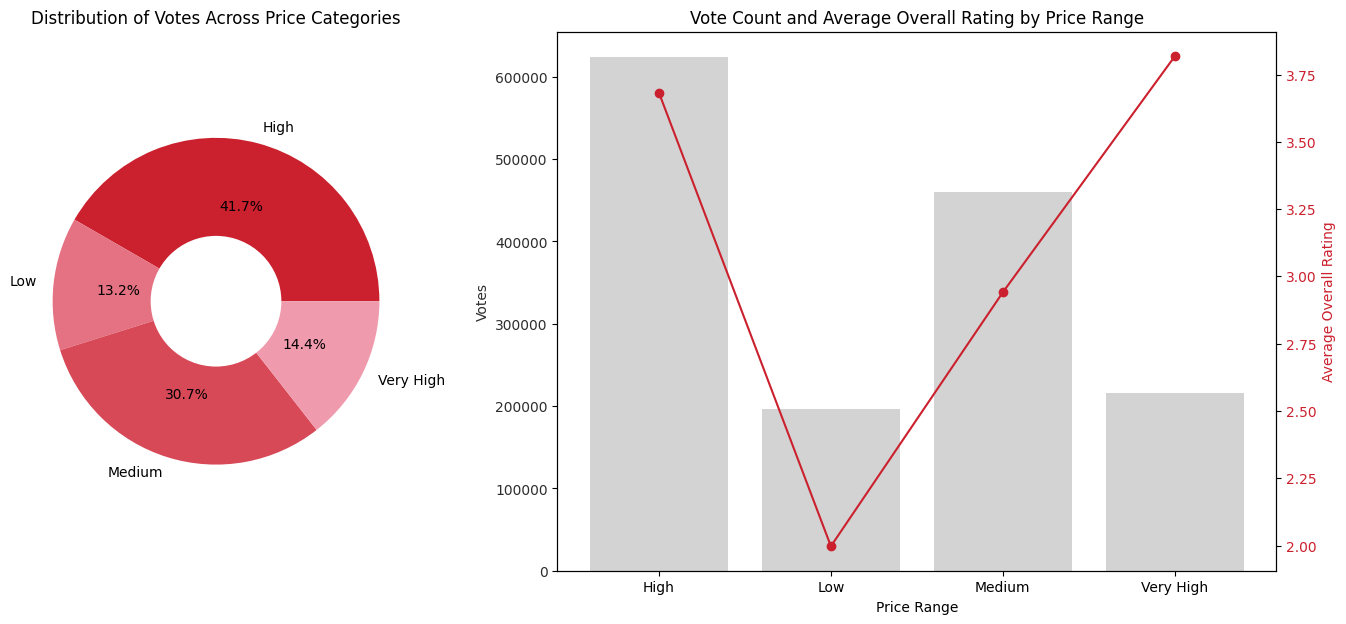

In [ ]:
# Create figure and axis for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={'width_ratios': [1, 2]})
#Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Create a Donut chart
red_shades = ['#cb202d', '#e47283', '#d84958', '#f09bad']
patches, texts, autotexts = ax1.pie(x=df_price_votes['votes'], labels=df_price_votes['price_range'],
                                   autopct='%1.1f%%', colors=red_shades)

# Add a circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.4, fc='white')
# Add circle to ax1
ax1.add_artist(centre_circle)
# Fix aspect ratio
ax1.axis('equal')
# Set title for donut chart
ax1.set_title('Distribution of Votes Across Price Categories')


# Create a Bar and Line Chart
ax2.bar(df_price_votes['price_range'], df_price_votes['votes'], color='lightgrey')
ax2.set_xlabel('Price Range')
ax2.set_ylabel('Votes', color='#2D2D2D')
ax2.set_title('Vote Count and Average Overall Rating by Price Range')
ax2.tick_params(axis='y', labelcolor='#2D2D2D')
# Create a second y-axis for average overall rating
ax3 = ax2.twinx()
ax3.plot(df_price_ratings['price_range'], df_price_ratings['avg_overall_rating'], color='#CB202D', marker='o')
ax3.set_ylabel('Average Overall Rating', color='#CB202D')
ax3.tick_params(axis='y', labelcolor='#CB202D' )
plt.show()

<font color= '#CB202D'>*We have a combination of 2 visualizations:*</font>

<font color='#CB202D'>1. *The donut chart shows the proportion of votes across different price categories. This chart helps to identify the most popular price range in terms of votes.* </font>

<font color='#CB202D'>2. *Combining a bar chart (for vote count) and a line chart (for average rating) on the same axis provides two complementary perspectives: popularity (vote count) and perceived quality (average rating). We can see how customer satisfaction varies across different price points*</font>

#### <b> Comparing Average Restaurant Popularity by Price Category</b>

Understanding how customer voting patterns vary across price ranges can provide valuable insights into restaurant popularity within the different affordability segments.

In [ ]:
df.groupby(['price_range'])['votes'].describe().reset_index()

,price_range,count,mean,std,min,25%,50%,75%,max
0,High,1405.0,443.762989,728.333912,0.0,81.00,199.0,496.00,7931.0
1,Low,4438.0,44.374493,141.304352,0.0,1.00,8.0,32.00,3591.0
2,Medium,3113.0,147.607131,380.635739,0.0,14.00,51.0,142.00,9667.0
3,Very High,586.0,368.595563,695.782527,0.0,49.25,171.5,394.75,10934.0


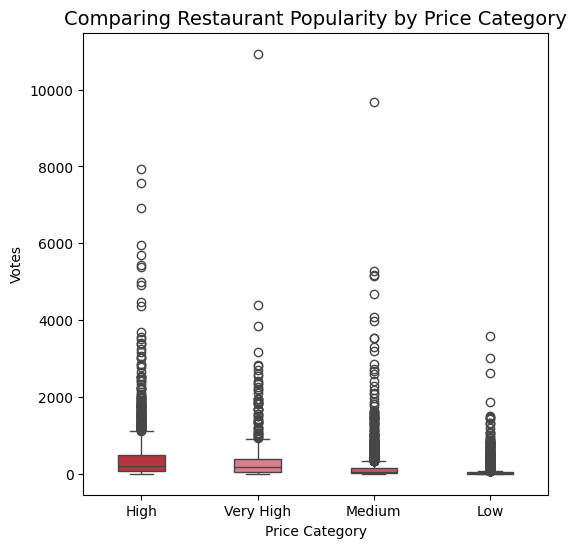

In [ ]:
# Create a boxplot
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x = 'price_range', y='votes', data = df,palette=red_shades, width=0.4)
plt.title('Comparing Restaurant Popularity by Price Category', fontsize=14)
plt.xlabel('Price Category')
plt.ylabel('Votes')
plt.show()


<font color='#cb202d'>*The box plot compares how restaurants in different price ranges perform in terms of customer engagement or popularity (as measured by votes).*</font>

### ☝ Conclusion

 This analysis reveals that higher-priced restaurants generally attract more votes and achieve higher average ratings on Zomato. The "High" price range emerges as the most popular, indicating strong customer engagement and satisfaction. While the "Very High" price range also performs well in terms of average ratings, it receives fewer votes. This suggests that customers are willing to pay a premium for perceived quality and value.



### 4.3.2 How does the variability in pricing correlate with customer satisfaction ratings among the top 10 restaurant chains with the most outlets?


We aim to examine the relationship between the standard deviation of costs and average customer ratings, providing insights into whether higher price variability affects overall customer satisfaction among the restaurant chains with the most locations.

Analyzing the top 10 restaurants with the most outlets offers insights into industry trends and customer preferences due to their large market presence and diverse customer base. This helps identify successful strategies and areas for improvement.




In [ ]:
df_india.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'country'],
      dtype='object')

In [ ]:
# Find indian restaurants with most outlets
top_10_rsts = df_india['restaurant_name'].value_counts().reset_index(name='outlet_count').head(10)

In [ ]:
df_india_top_10 = df_india[df_india['restaurant_name'].isin(top_10_rsts['restaurant_name'])]
df_india_top_10_cts_rating = df_india_top_10.groupby('restaurant_name').agg(
    std_costs=('average_cost_for_two', 'std'),
    avg_rating=('aggregate_rating', 'mean')
).reset_index()

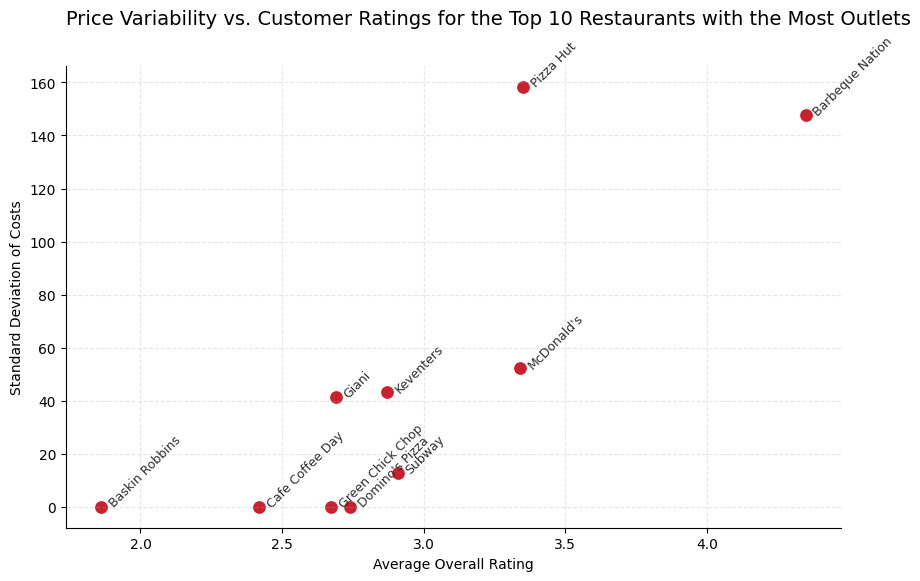

In [ ]:
plt.figure(figsize=(10, 6))

# Create scatterplot
sns.scatterplot(
    x='avg_rating',
    y='std_costs',
    data=df_india_top_10_cts_rating,
    s=100,
    color='#CB202D'
)

# Annotate restaurant names with offset
for i, row in df_india_top_10_cts_rating.iterrows():
  plt.text( row['avg_rating'] + 0.02, row['std_costs']+ 0.02, # Adjust the vertical offset here
           row['restaurant_name'], fontsize=9, color='#2D2D2D' ,
           rotation = 45)

# Add labels and title
plt.title('Price Variability vs. Customer Ratings for the Top 10 Restaurants with the Most Outlets', fontsize=14, loc='left', pad=30)
plt.xlabel('Average Overall Rating')
plt.ylabel('Standard Deviation of Costs')
plt.grid(True, linestyle='--', alpha=0.3)

# Despine the plot
sns.despine(right=True, top=True)

# Show plot
plt.show()


<font color='#cb202d'>*The scatterplot displays the relationship between  the standard deviation of costs and the average customer ratings for the top 10 restaurant chains with the most outlets.*</font>

### ☝ Conclusion

- Barbeque Nation exhibits the highest price variability and maintains high average ratings, indicating that the value and quality provided justify the price differences.

- While exhibiting high price variability Pizza Hut, has lower average ratings compared to Barbeque Nation. This suggests that although Pizza Hut offers a diverse price range, it may struggle with consistent customer satisfaction.

- Chains like Cafe Coffee Day, Giani, Keventers, Green Chick Chop, Domino's Pizza, and Subway show stable pricing with satisfactory customer experiences.

- Baskin Robbins displays the lowest price variability but has relatively low ratings, indicating that consistent pricing does not ensure higher customer satisfaction.

**High price variability can correlate with satisfaction if quality and value justify the range.
Customers value consistent pricing but also appreciate diversity catering to preferences and budgets.**